In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [138]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [139]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [140]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [141]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [142]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/Log3bda&ndciModel/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [143]:
# Return the natural logarithm of Chl-a (Y)
MergedData['LnChl-a']=np.log(MergedData['Chl-a'])
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B7        B8       B8A        B9  \
0     0.012669

In [144]:
# Descriptive statistics of all variables
list = ['3BDA', 'NDCI', 'LnChl-a']

# get the summary
desc_mergeddata = MergedData [list].describe()

# add the standard deviation metric
desc_mergeddata.loc['+3_std'] = desc_mergeddata.loc['mean'] + (desc_mergeddata.loc['std'] * 3)
desc_mergeddata.loc['-3_std'] = desc_mergeddata.loc['mean'] - (desc_mergeddata.loc['std'] * 3)

# display it
desc_mergeddata

,3BDA,NDCI,LnChl-a
count,1487.000000,1487.000000,1487.000000
mean,0.015297,-0.005038,1.502210
std,0.191915,0.054806,1.279814
min,-0.183174,-0.113502,-2.995732
25%,-0.093031,-0.042380,0.641854
50%,-0.035932,-0.016578,1.360977
75%,0.067505,0.023032,2.301784
max,2.150818,0.368135,5.113793
+3_std,0.591042,0.159379,5.341652
-3_std,-0.560448,-0.169455,-2.337232


In [145]:
# Pearson Coefficient 
corr = MergedData[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,3BDA,NDCI,LnChl-a
3BDA,1.000000,0.912430,0.183449
NDCI,0.912430,1.000000,0.295937
LnChl-a,0.183449,0.295937,1.000000


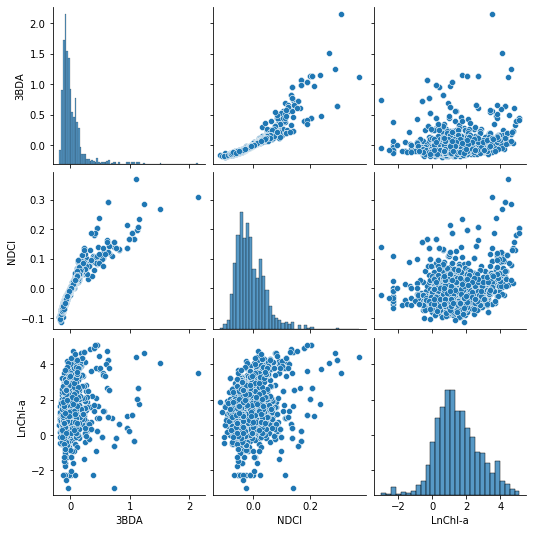

In [146]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData[list])

In [147]:
# Getting column names
X_columns = ["3BDA", "NDCI"]
Y = MergedData["LnChl-a"]

In [148]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData[X_columns[0:2]].values, i) for i in range(MergedData[X_columns[0:2]].shape[1])]
vif["features"] = MergedData[X_columns[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,5.0,3BDA
1,5.0,NDCI


In [149]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData[X_columns]
Y = MergedData['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.041
Method:                 Least Squares   F-statistic:                              23.38
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                    1.17e-10
Time:                        18:10:22   Log-Likelihood:                         -2167.5
No. Observations:                1040   AIC:                                      4339.
Df Residuals:                    1038   BIC:                                      4349.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [150]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 91     -0.081826
1102    0.061587
1237   -0.098834
683     0.016824
561    -0.037992
          ...   
154    -0.161374
639     0.282248
768    -0.027527
821    -0.035536
1006    1.782542
Length: 447, dtype: float64


In [151]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.44
MAE 1.1
RMSE 1.56


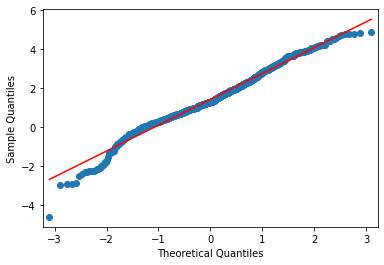

The mean of the residuals is 1.423


In [152]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [153]:
# MergedData: Threshold  Chl-a < 2
MergedData1 = MergedData.loc[(MergedData["LnChl-a"] > 0.30103)]
MergedData1.shape

(1270, 25)

In [154]:
# get the summary
desc_mergeddata1 = MergedData1 [list].describe()

# add the standard deviation metric
desc_mergeddata1.loc['+3_std'] = desc_mergeddata1.loc['mean'] + (desc_mergeddata1.loc['std'] * 3)
desc_mergeddata1.loc['-3_std'] = desc_mergeddata1.loc['mean'] - (desc_mergeddata1.loc['std'] * 3)

# display it
desc_mergeddata1

,3BDA,NDCI,LnChl-a
count,1270.000000,1270.000000,1270.000000
mean,0.015509,-0.004027,1.816260
std,0.186740,0.055060,1.073750
min,-0.183174,-0.113502,0.302472
25%,-0.091724,-0.041783,0.946238
50%,-0.032938,-0.014468,1.606031
75%,0.071255,0.025499,2.483189
max,2.150818,0.368135,5.113793
+3_std,0.575730,0.161154,5.037510
-3_std,-0.544711,-0.169209,-1.404990


In [155]:
# Pearson Coefficient 
corr1 = MergedData1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,3BDA,NDCI,LnChl-a
3BDA,1.000000,0.910328,0.264102
NDCI,0.910328,1.000000,0.378103
LnChl-a,0.264102,0.378103,1.000000


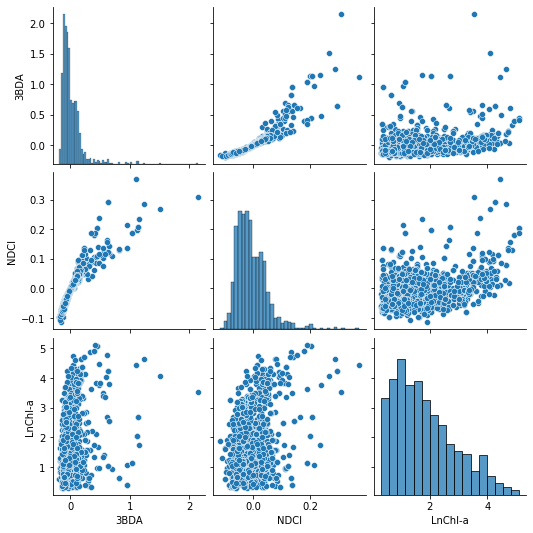

In [156]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData1[list])

In [157]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData1[X_columns]
Y = MergedData1['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.049
Model:                            OLS   Adj. R-squared (uncentered):              0.047
Method:                 Least Squares   F-statistic:                              22.80
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                    2.20e-10
Time:                        18:10:49   Log-Likelihood:                         -1910.2
No. Observations:                 889   AIC:                                      3824.
Df Residuals:                     887   BIC:                                      3834.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [158]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 1178   -0.032473
257    -0.044219
712    -0.062645
469     0.039190
1234    0.295348
          ...   
346     0.530088
773     0.064264
433    -0.076386
946    -0.039109
1297   -0.085747
Length: 381, dtype: float64


In [159]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 60.8
MAE 1.74
RMSE 7.8


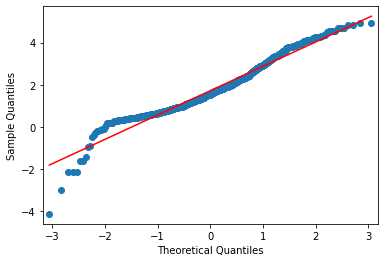

The mean of the residuals is 1.724


In [160]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [161]:
# MergedData: Threshold  Chl-a > 8
MergedData2 = MergedData.loc[(MergedData["LnChl-a"] > 0.9031)]
MergedData2.shape

(985, 25)

In [162]:
# get the summary
desc_mergeddata2 = MergedData2 [list].describe()

# add the standard deviation metric
desc_mergeddata2.loc['+3_std'] = desc_mergeddata2.loc['mean'] + (desc_mergeddata2.loc['std'] * 3)
desc_mergeddata2.loc['-3_std'] = desc_mergeddata2.loc['mean'] - (desc_mergeddata2.loc['std'] * 3)

# display it
desc_mergeddata2

,3BDA,NDCI,LnChl-a
count,985.000000,985.000000,985.000000
mean,0.026851,0.000499,2.165318
std,0.194370,0.057232,0.966410
min,-0.181705,-0.113502,0.904218
25%,-0.085417,-0.038583,1.373716
50%,-0.021366,-0.009990,1.931521
75%,0.079432,0.029666,2.788462
max,2.150818,0.368135,5.113793
+3_std,0.609960,0.172195,5.064548
-3_std,-0.556258,-0.171196,-0.733912


In [163]:
# Pearson Coefficient 
corr2 = MergedData2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,3BDA,NDCI,LnChl-a
3BDA,1.000000,0.907967,0.271112
NDCI,0.907967,1.000000,0.393683
LnChl-a,0.271112,0.393683,1.000000


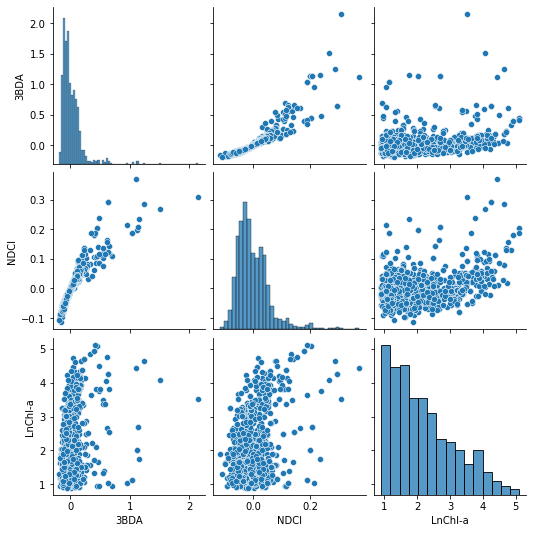

In [164]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData2[list])

In [165]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData2[X_columns]
Y = MergedData2['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.062
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              22.58
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                    3.17e-10
Time:                        18:11:19   Log-Likelihood:                         -1538.8
No. Observations:                 689   AIC:                                      3082.
Df Residuals:                     687   BIC:                                      3091.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [166]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 1446    0.045578
404     0.065006
750     0.089117
1236    0.001509
1108    0.108391
          ...   
688     0.018352
651     0.708454
121    -0.601468
634     0.104525
1179    0.068597
Length: 296, dtype: float64


In [167]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 3.76e+02
MAE 3.15
RMSE 19.4


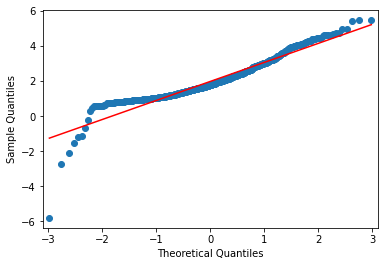

The mean of the residuals is 1.98


In [168]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))